In [4]:
suppressPackageStartupMessages({
library(tidyverse)
library(Gviz)
library(rtracklayer)
library(GenomicFeatures)
library(data.table)
    library(ggprism)
    })

In [5]:
GTF_dir <- "../gencode.v40.annotation.gtf"

#hg38_txdb <- makeTxDbFromGFF(GTF_dir,
#                                 format="gtf",
#                                 organism="Homo sapiens",
#                                 dbxrefTag = "gene_name")
 
 
#saveDb(hg38_txdb, "~/BE_paper_2022/reference_files/hg38.txdb")

hg38_txdb <- loadDb("../reference_files/hg38.txdb")


In [6]:
gtrack <- GenomeAxisTrack()
# specify the start and end of chromosome 
chr_no <- 12 
chr_start <- 9740000  # start of region
chr_end <- 9780000 # end of region

gen <- 'hg38'

## set gene region track
gtTrack <- GeneRegionTrack(hg38_txdb,
                           chromosome=chr_no, # chromosome number
                           start=chr_start, # start of region
                           end=chr_end, # end of region
                           transcriptAnnotation="gene_id", # symbol is the gene symbol
                           fontsize.group=20# free to adjust font size
)

In [7]:

p258_stim = import.bw("../data_and_analyses/ATAC/258_v_260_edit_v_WT/bigwigs/Jurkat_P258_stim.merged.bw",as="GRanges")
p260_stim = import.bw("../data_and_analyses/ATAC/258_v_260_edit_v_WT/bigwigs/Jurkat_P260_stim.merged.bw",as="GRanges")


options(ucscChromosomeNames=FALSE)


p258_stim_tr <- DataTrack(
  range = p258_stim,
  chromosome=chr_no,
  start=chr_start, # start of region
  end=chr_end, # end of region
  col.histogram = "red",
  ylim = c(0,100)
)

p260_stim_tr <- DataTrack(
  range = p260_stim,
  chromosome=chr_no,
  start=chr_start, # start of region
  end=chr_end, # end of region
  col.histogram = "red",
  ylim = c(0,100)
)

In [8]:
pdf("3C_atac_bigwig.pdf")
## modify remainder in AI 
plotTracks(list(gtrack,
                gtTrack,
                p258_stim_tr,
                p260_stim_tr), shape = "arrow", 
           transcriptAnnotation = "symbol", chromosome = "chr12",from = chr_start, to= chr_end,
           type = c("h","coverage"),sizes=c(5,5,5,5)
           )
dev.off()

png 
  2

Warning message in fread("../data_and_analyses/ATAC/258_v_260_edit_v_WT/RE4_peak.out"):
"Detected 3 column names but the data has 4 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Saving 6.67 x 6.67 in image



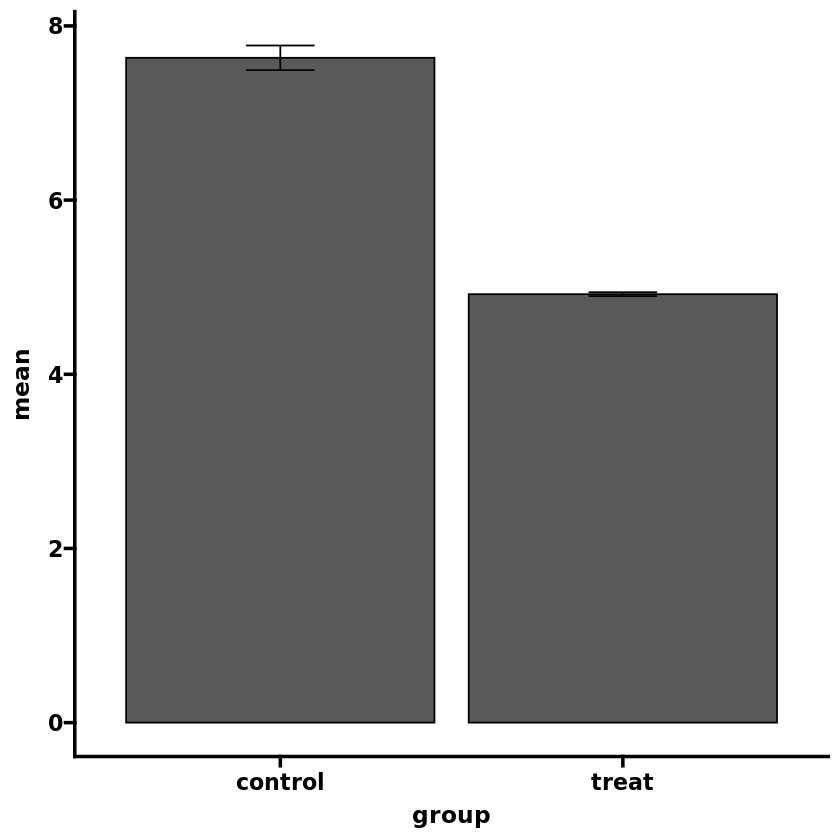

In [9]:
library(ggprism)
grouped_counts <- fread('../data_and_analyses/ATAC/258_v_260_edit_v_WT/RE4_peak.out')
ggplot(grouped_counts,aes(x=group,y=mean)) + geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2,
                 position=position_dodge(.9)) + theme_prism()
ggsave("CRE4.pdf")


Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


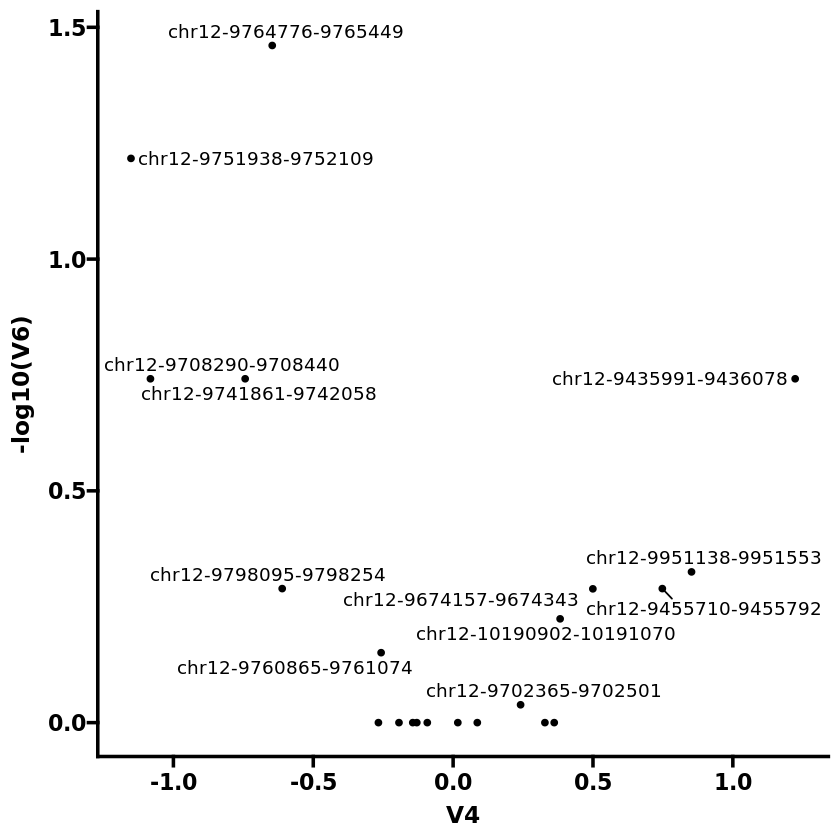

In [23]:
#### da analysis 1MB
library(ggrepel)
windows <- fread('../data_and_analyses/ATAC/258_v_260_edit_v_WT/ROI_windows.adjusted.bed')
windows$name <- paste(windows$V1,windows$V2,sep='-')
windows$name <- paste(windows$name,windows$V3,sep='-') 
ggplot(windows, aes(x=V4,y=-log10(V6),label=name)) + geom_point() + geom_text_repel() + theme_prism()
ggsave("DA_analysis_1MB_window.pdf")